### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [3]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Check for null values

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### As we can see the biggest part of our dataframe is dominated by categorical columns.

In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Describe categorical features

In [9]:
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
df['capital.loss'].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0], dtype=int64)

### Lets start our data analysis with finding dublicates and if needed drop them

In [11]:
df.duplicated().sum()

24

In [12]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19622,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
10307,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
17456,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
22934,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(32537, 15)

### Main questions for our dataset:
#### The importance of "?" in our dataset
#### The relation between age and income
#### The relation between number of hours per week and income
#### How can we reduce capital.gain and capital.loss columns
#### The relation between education.num and income
#### How does the workclass column affect the income?

## Lets find the relation between columns with '?'

#### Check the number of '?' in workclass

In [15]:
k = 0
for i in df.workclass:
    if i == '?':
        k = k + 1
print(k)

1836


#### Check the number of '?' in occupation

In [16]:
k = 0
for i in df.occupation:
    if i == '?':
        k = k + 1
print(k)

1843


#### Check the number of '?' in native.country

In [17]:
k = 0
for i in df['native.country']:
    if i == '?':
        k = k + 1
print(k)

582


### Let's try to find a tangent between the missing values('?') in column native.country and other columns.

In [18]:
df_specific = df[df['native.country'] == '?']
df_specific = pd.DataFrame(df_specific)
df_specific

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [19]:
df_specific.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,38.740550,193384.587629,10.601375,1809.621993,118.469072,41.515464
std,12.410216,95504.200875,3.125466,11146.605495,471.610459,12.438306
min,17.000000,22245.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,132963.750000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,182586.500000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,227238.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,647882.000000,16.000000,99999.000000,3004.000000,99.000000


In [20]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### The only difference we can see is that there are higher values for capital gain and capital loss for df_specific therefore we will not drop those rows with '?' since they present an useful information 

### Total number of '?' in df

In [48]:
k = 0
lista = len(df.columns)
for i in range(lista):
    for j in df[df.columns[i]]:
        if j == '?':
            k = k + 1
print(k)

4261


#### check the case when '?' is present in workclass and occupation

In [49]:
k = 0
for i in range(len(df)):
    if df.iloc[i,1]==df.iloc[i,6]=='?':
        k = k + 1
print(k)

1836


#### check the case when '?' is present in workclass and native.country

In [50]:
k = 0
for i in range(len(df)):
    if df.iloc[i,1]==df.iloc[i,14]=='?':
        k = k + 1
print(k)

0


 #### check the case when '?' is present in native.country and occupation

In [51]:
k = 0
for i in range(len(df)):
    if df.iloc[i,6]==df.iloc[i,14]=='?':
        k = k + 1
print(k)

0


#### check the case when '?' is present in workclass , occupation and native.country

In [52]:
k = 0
for i in range(len(df)):
    if df.iloc[i,1]==df.iloc[i,14]==df.iloc[i,6]=='?':
        k = k + 1
print(k)

0


### So far we can observe that the number of '?' in columns[occupation and workclass] is almost the same which means that we can not drop them since they have a valuable information [If X doesn't have a workclass results that it doesn't have an accupation]

In [59]:
df_corr = df.corr(numeric_only=True)

<Axes: >

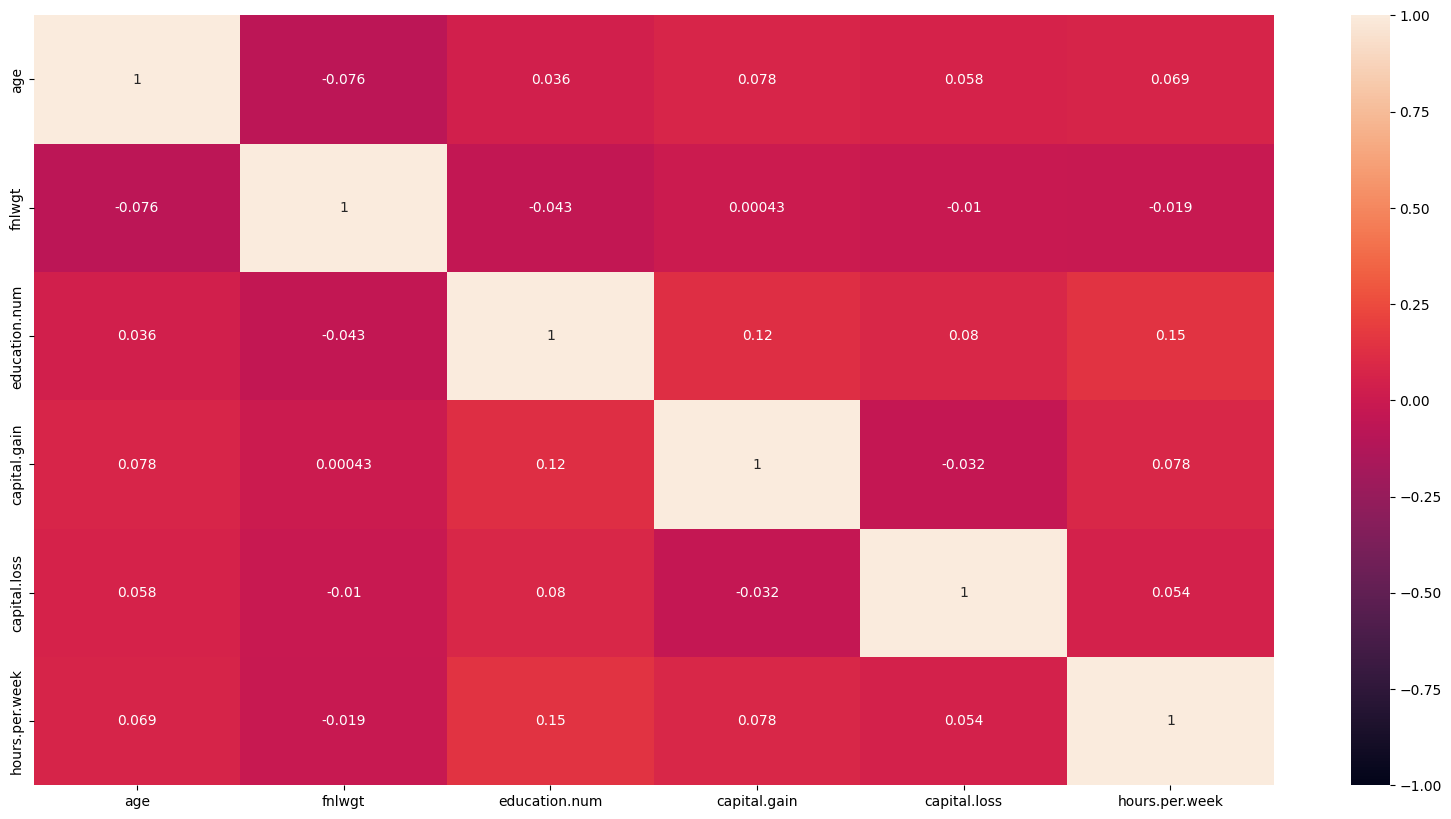

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,vmin=-1, vmax=1, annot=True)

#### we can see that the columns are not high correlated which means that each column has unique important information

### Now lets find the density of our numerical columns

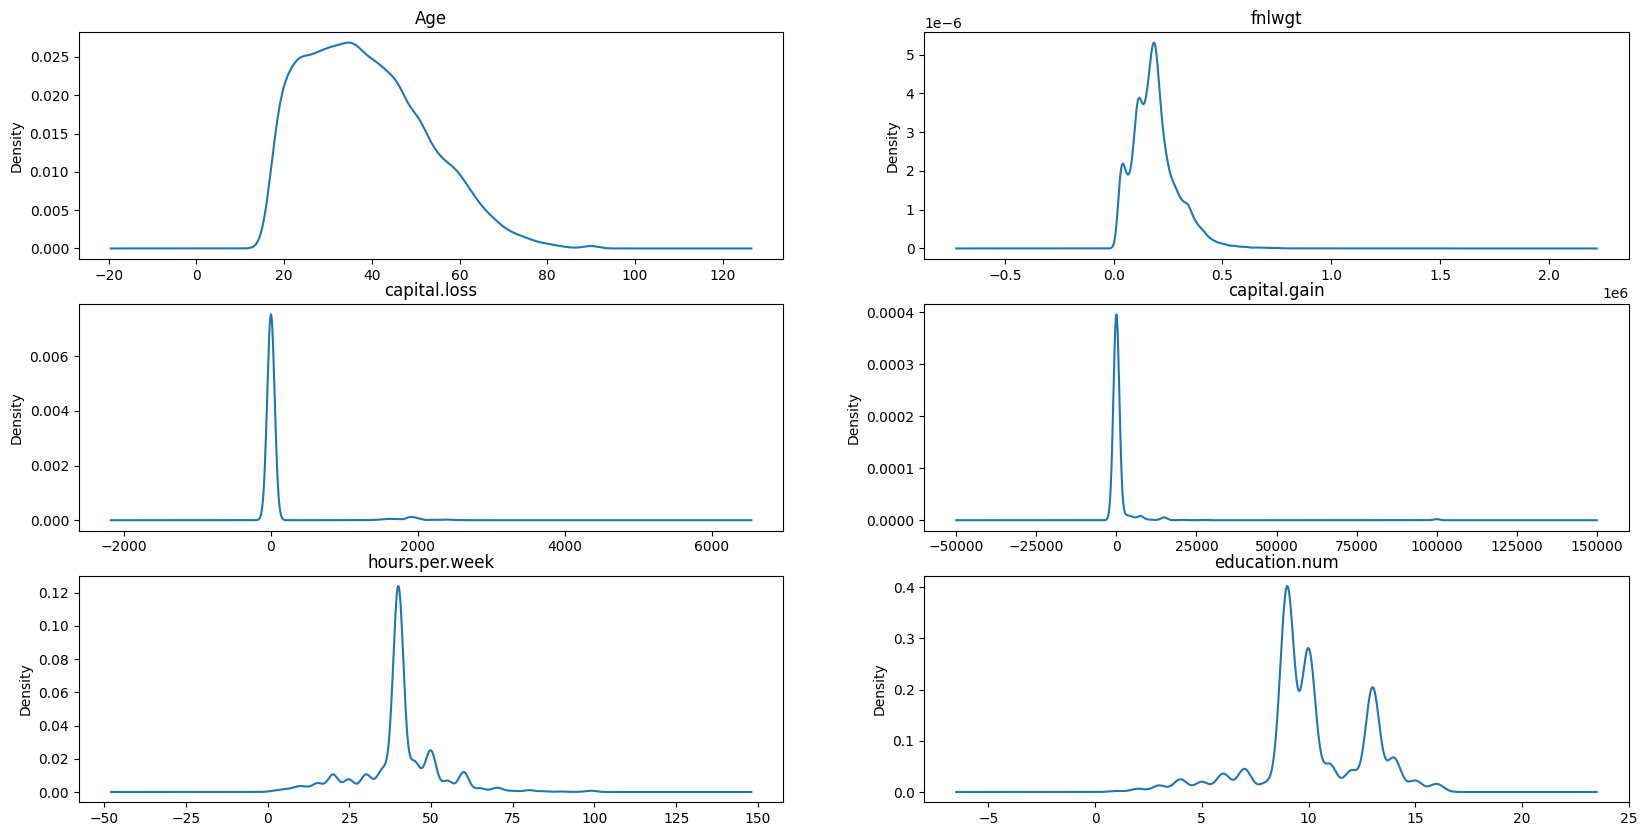

In [61]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# Plot the density plot on the first subplot
axes[0][0].set_title('Age')
df.age.plot(kind='density', ax=axes[0][0])

# Plot the second subplot (add more if needed)
axes[0][1].set_title('fnlwgt')
df.fnlwgt.plot(kind='density', ax=axes[0][1])

axes[1][0].set_title('capital.loss')
df['capital.loss'].plot(kind='density', ax=axes[1][0])

axes[1][1].set_title('capital.gain')
df['capital.gain'].plot(kind='density', ax=axes[1][1])

axes[2][0].set_title('hours.per.week')
df['hours.per.week'].plot(kind='density', ax=axes[2][0])

axes[2][1].set_title('education.num')
df['education.num'].plot(kind='density', ax=axes[2][1])

# Display the figure
plt.show()

#### - The  majority of the data in age column is between 19 and 55
#### - The  majority of the data in fnlwgt column is between 100000 and 400000
#### - The  majority of the data in capital.loos and capital gain columns is near 0 
#### - The the majority of the data in hours.per.week column is between 40 and 45
#### - The the majority of the data in education.num column is between 9 and 12



count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

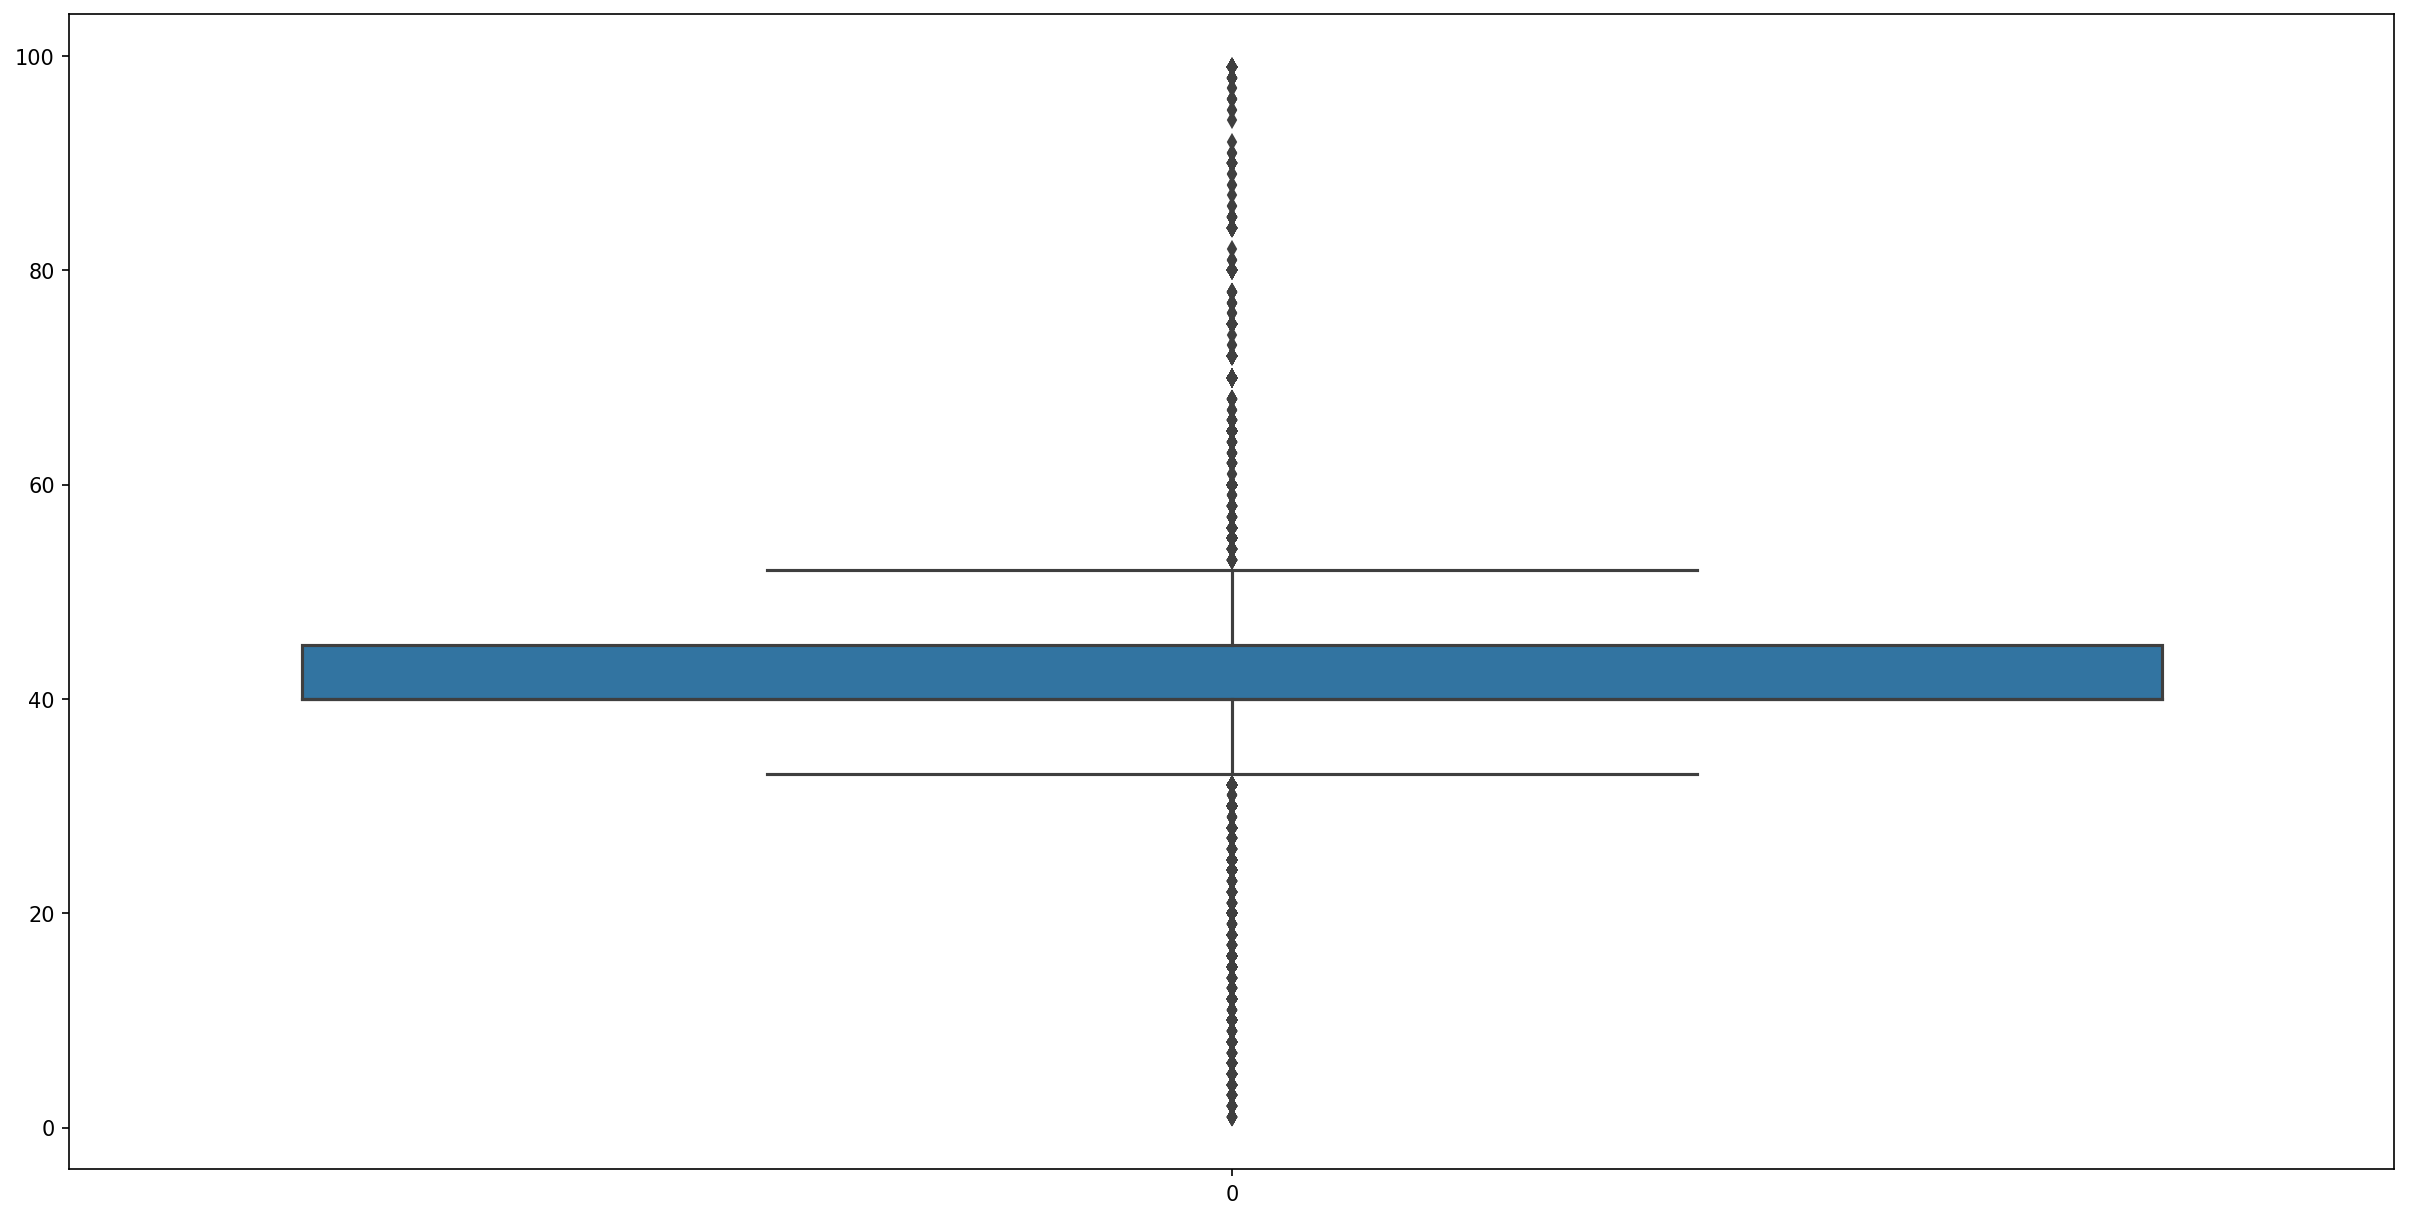

In [62]:
plt.figure(dpi=150, figsize=(20,10))
sns.boxplot(df['hours.per.week'])
df['hours.per.week'].describe()


#### As we can see the minimal value is 1 and the maximal value is 99, the majority of people work about 45 hours per week.

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

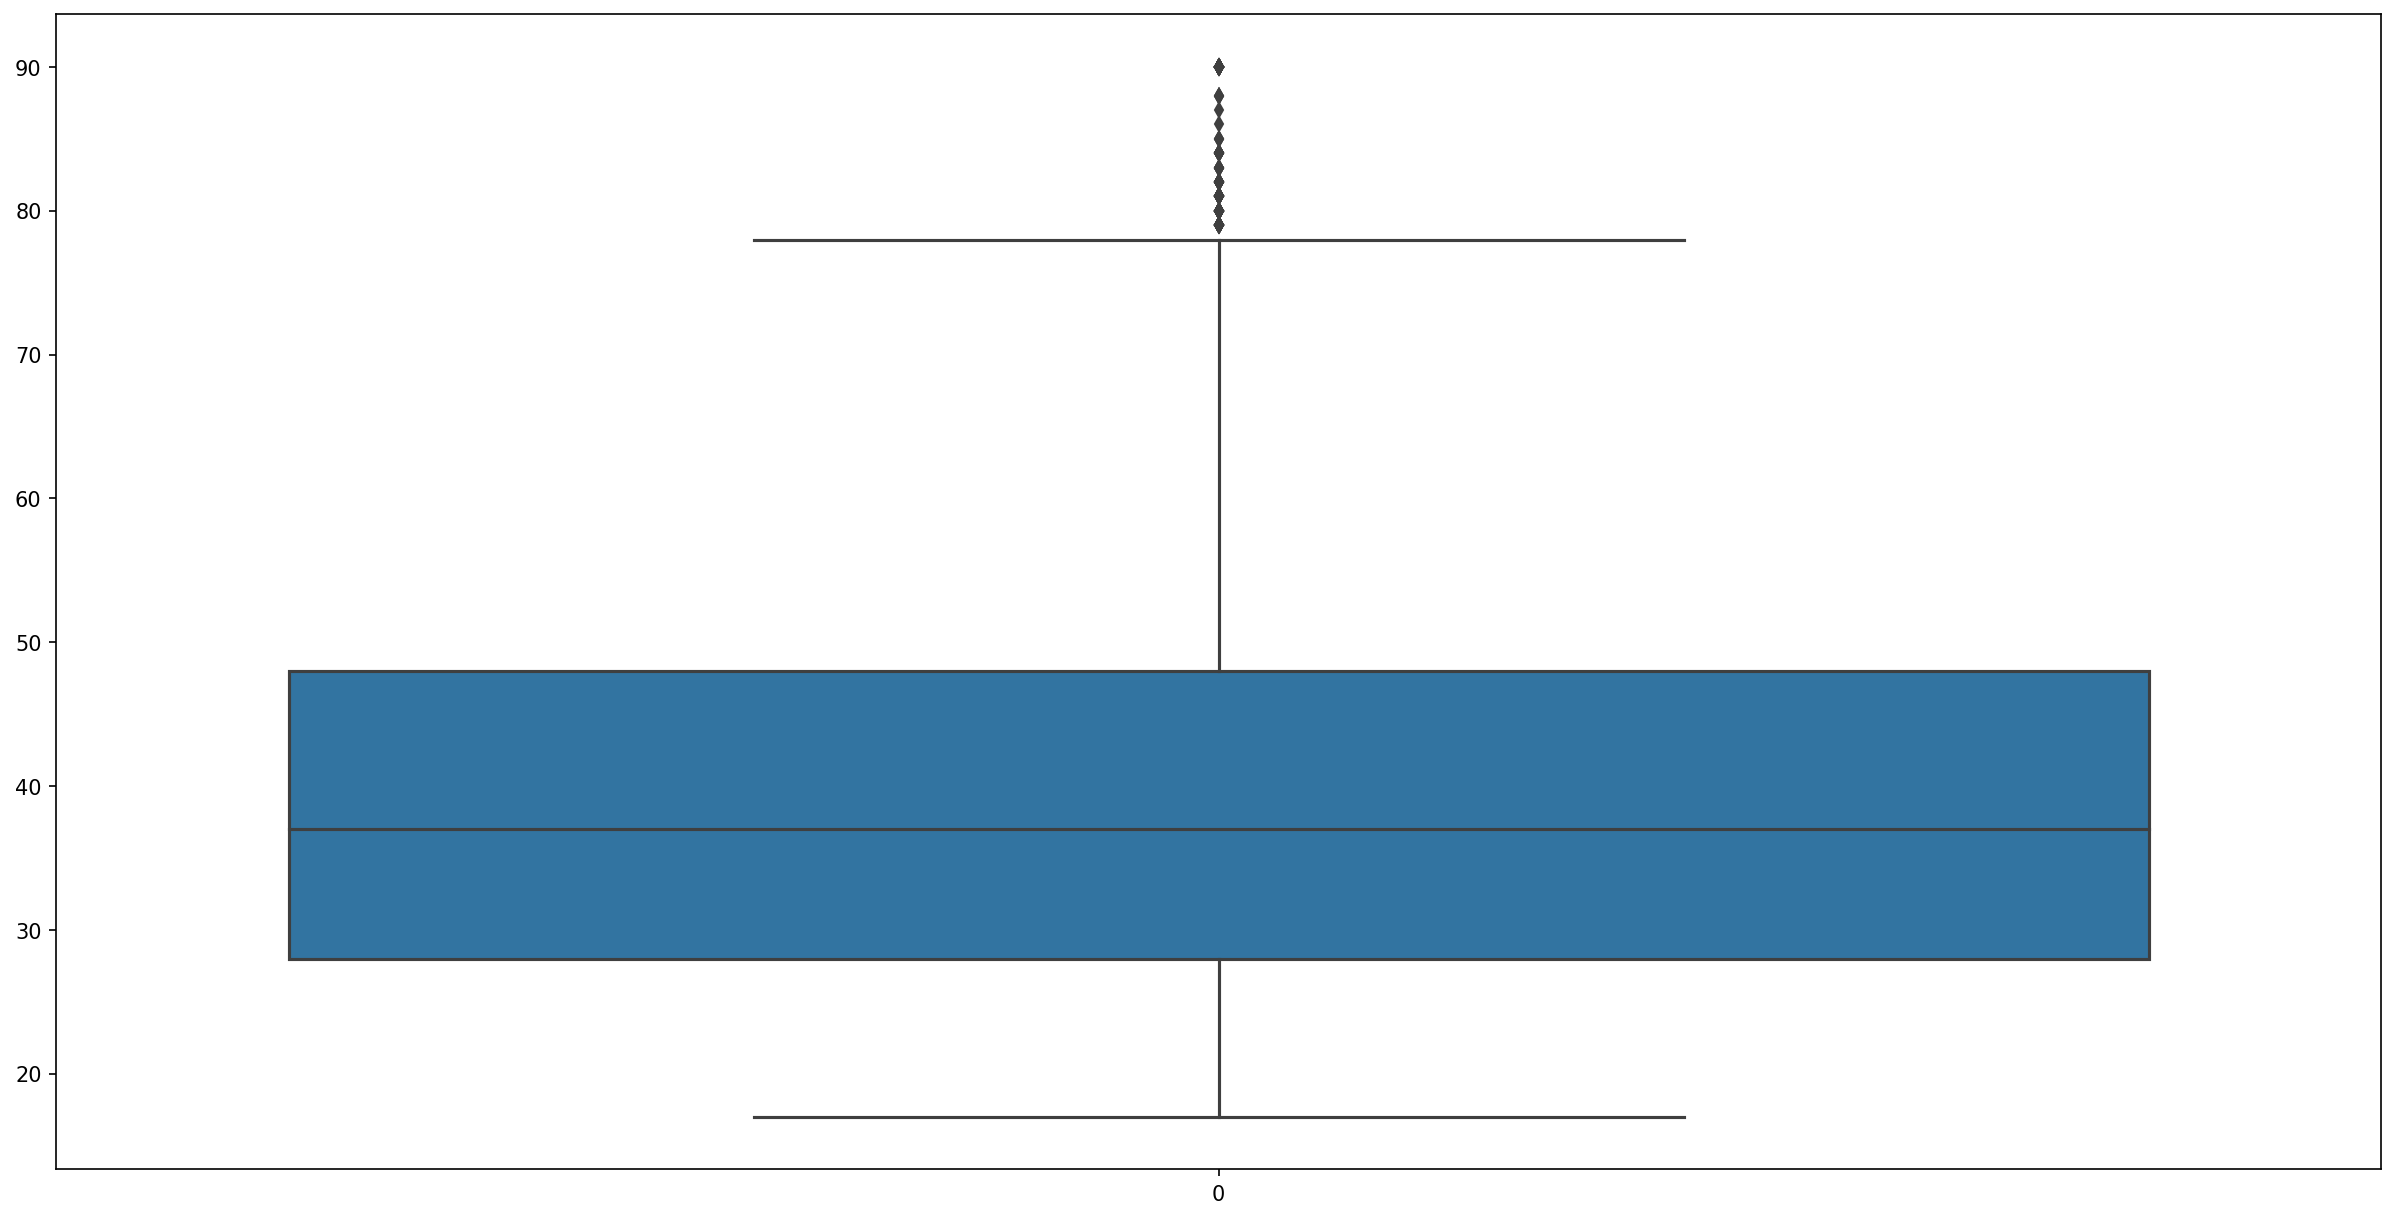

In [63]:
plt.figure(dpi=150, figsize=(20,10))
sns.boxplot(df['age'])
df['age'].describe()


#### As we can see the minimal value is 17 and the maximal value is 90, the majority data is represented by people of 48 years.

<Axes: >

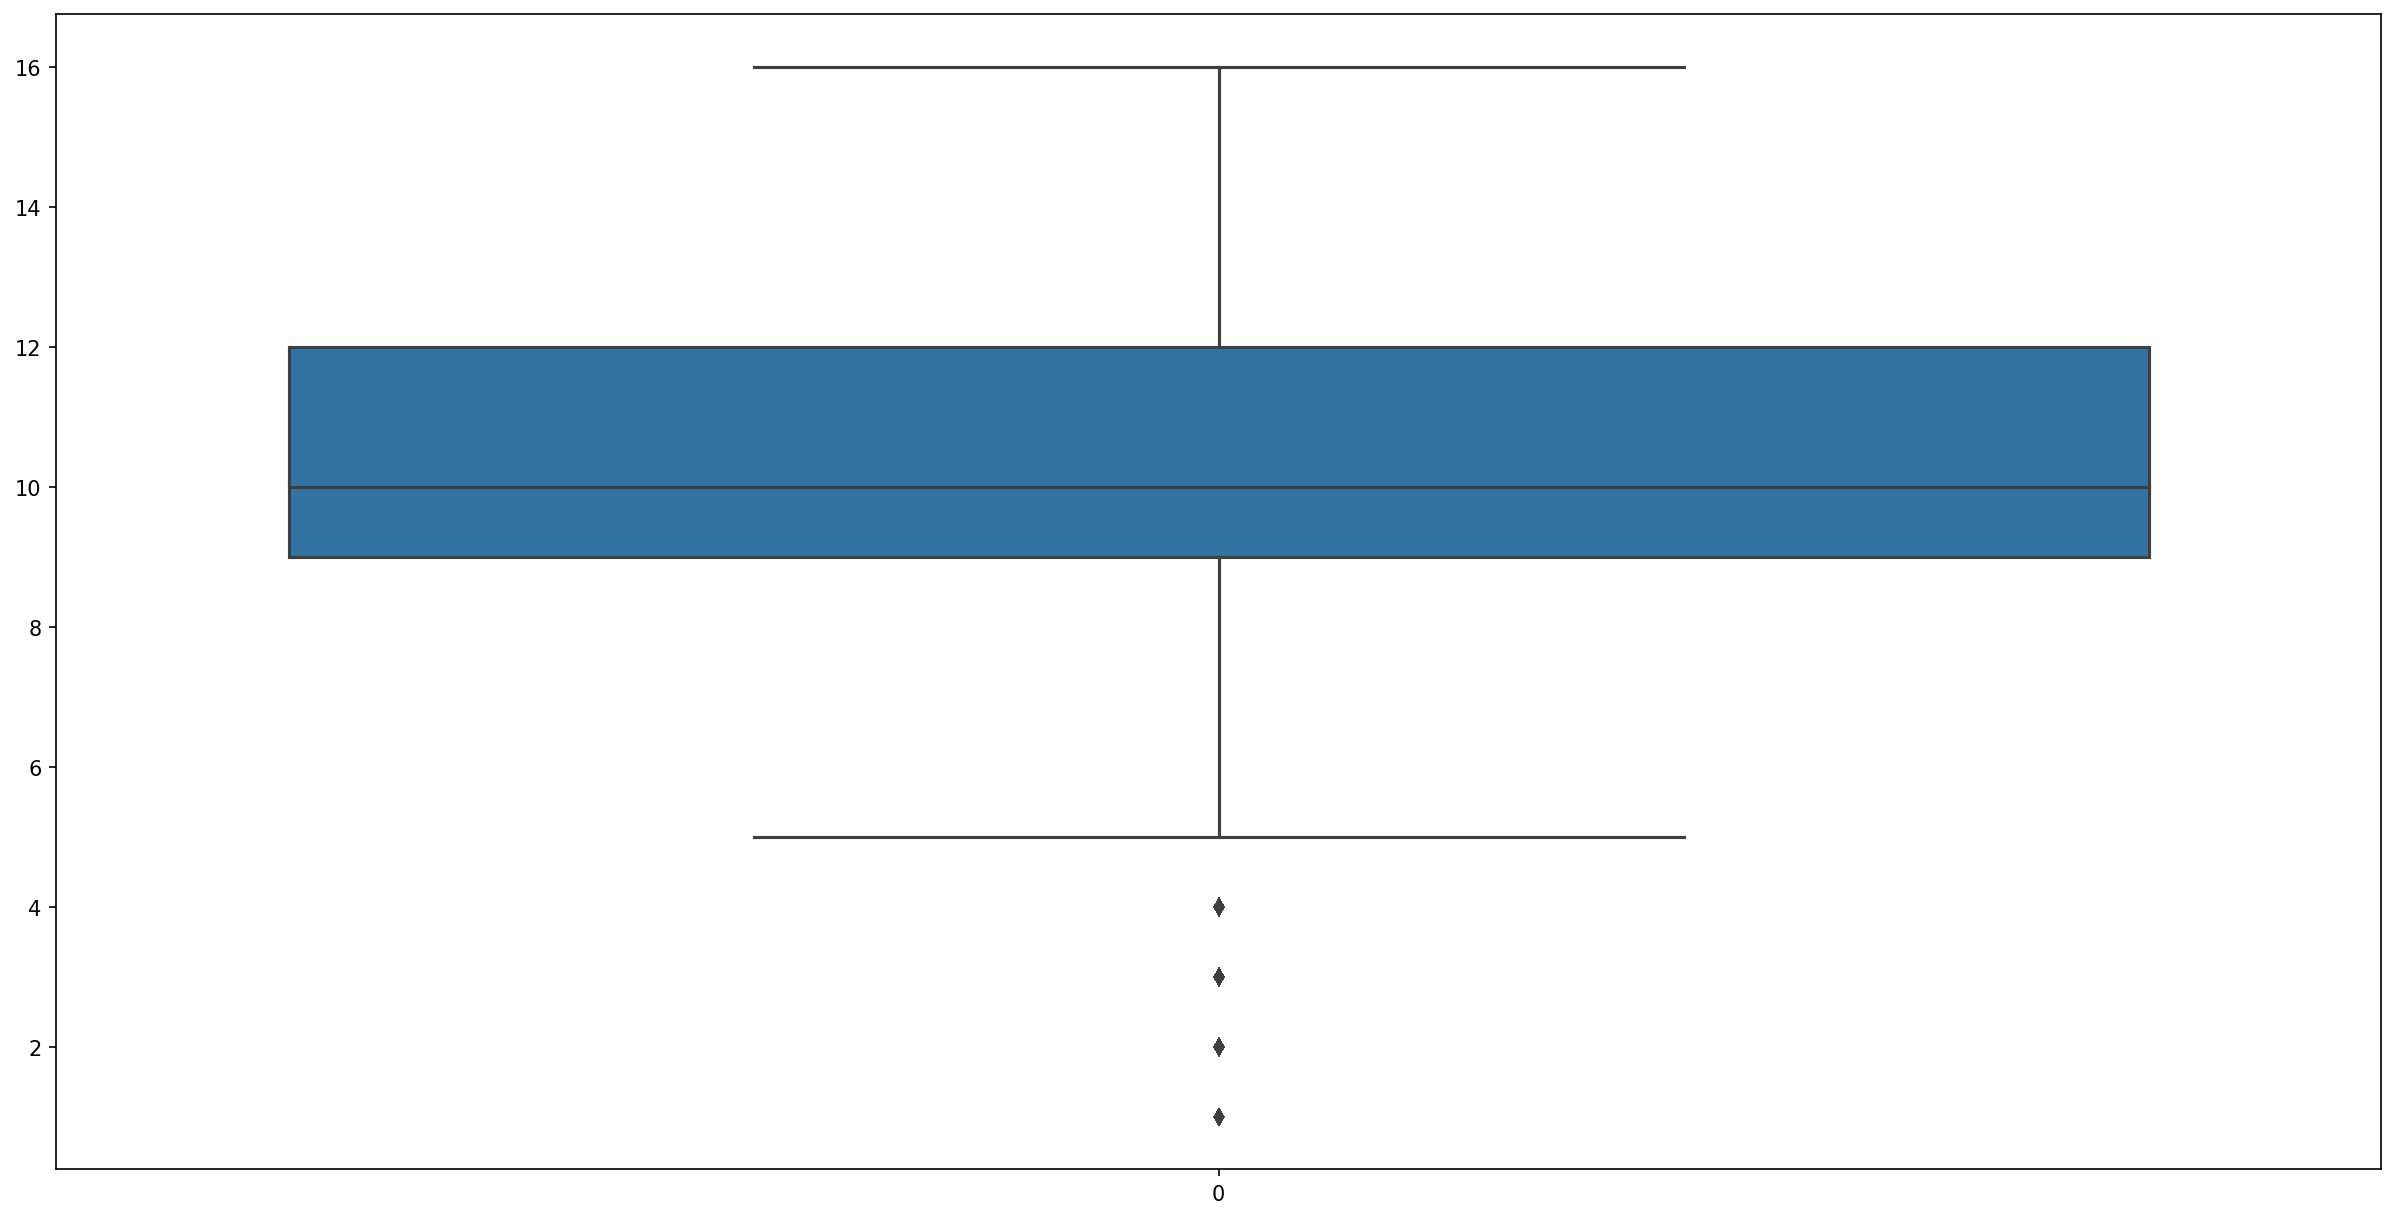

In [64]:
plt.figure(dpi=150, figsize=(20,10))
sns.boxplot(df['education.num'])

#### The boxplots above give us a general idea about the presence of outliers in some columns but this topic will be discussed later

### Find the relation between age and capital.gain

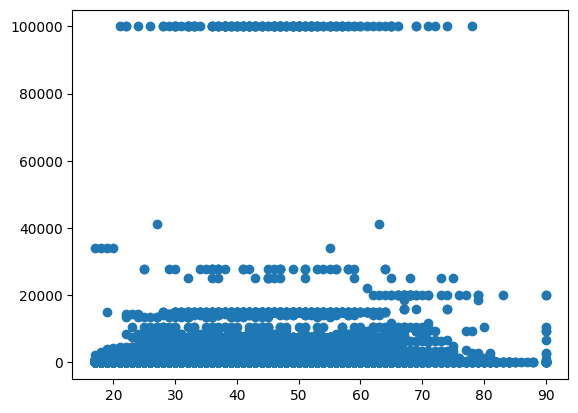

In [65]:
x = df.age
y = df['capital.gain']
plt.scatter(x, y)
plt.show()

#### Older people also reach a capital.gain but the values are not so high

### Find the relation between age and capital.loss

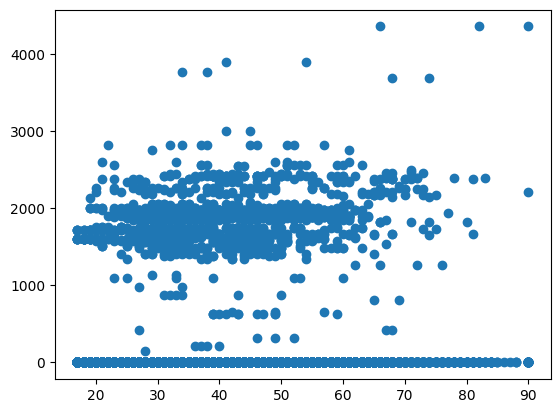

In [41]:
x = df.age
y = df['capital.loss']
plt.scatter(x, y)
plt.show()

#### Older people are not so affected by a capital.loss

### Let see if older people have a capital.gain

In [42]:
print(df[(df['age'] > 70) & (df['capital.gain'] > 0)].count())
print(df[(df['age'] > 70)].count())
print(df[(df['age'] > 70) & (df['capital.loss'] > 0)].count())


age               80
workclass         80
fnlwgt            80
education         80
education.num     80
marital.status    80
occupation        80
relationship      80
race              80
sex               80
capital.gain      80
capital.loss      80
hours.per.week    80
native.country    80
income            80
dtype: int64
age               539
workclass         539
fnlwgt            539
education         539
education.num     539
marital.status    539
occupation        539
relationship      539
race              539
sex               539
capital.gain      539
capital.loss      539
hours.per.week    539
native.country    539
income            539
dtype: int64
age               29
workclass         29
fnlwgt            29
education         29
education.num     29
marital.status    29
occupation        29
relationship      29
race              29
sex               29
capital.gain      29
capital.loss      29
hours.per.week    29
native.country    29
income            29
dtype: int64


#### Conclusion: In most cases older people have a capital.gain rather than a capital loss, it may be related to their houses or other investments (Accumulated Investments,Long-Term Investments,Diversification and Risk Management,Selling Assets)

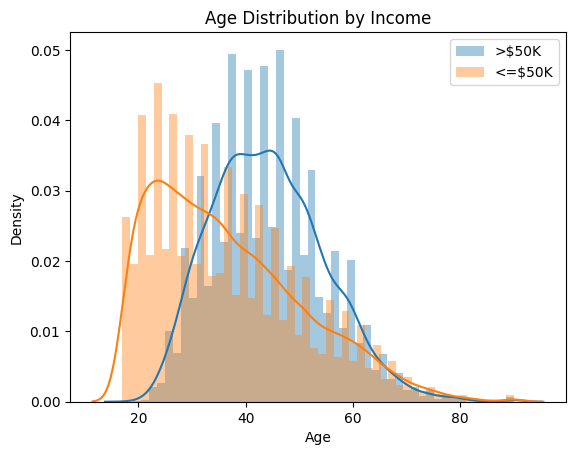

In [30]:
sns.distplot(df[df['income'] == '>50K']['age'],label='>$50K')
sns.distplot(df[df['income'] == '<=50K']['age'], label='<=$50K')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Income')
plt.legend()
plt.show()

##### According to the plot above older people have a bigger income

### Find the relation between hours.per.week and age

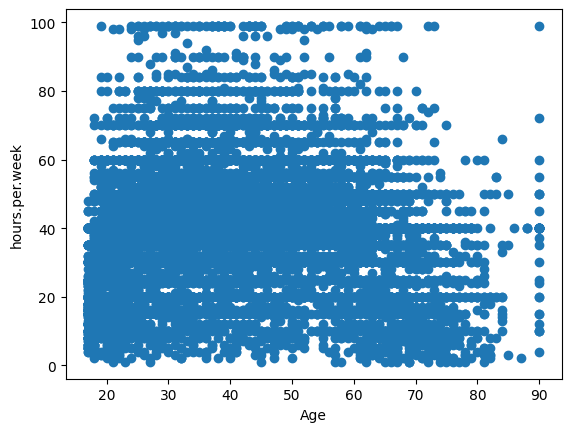

In [68]:
x = df.age
y = df['hours.per.week']
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('hours.per.week')
plt.show()

#### As we can see a higher age value leads to a lower working hours value (Exception: we can see that we have a 90 years old who has 100 hours.per.week , probably an outlier).

 ### How does the workclass column affects the income

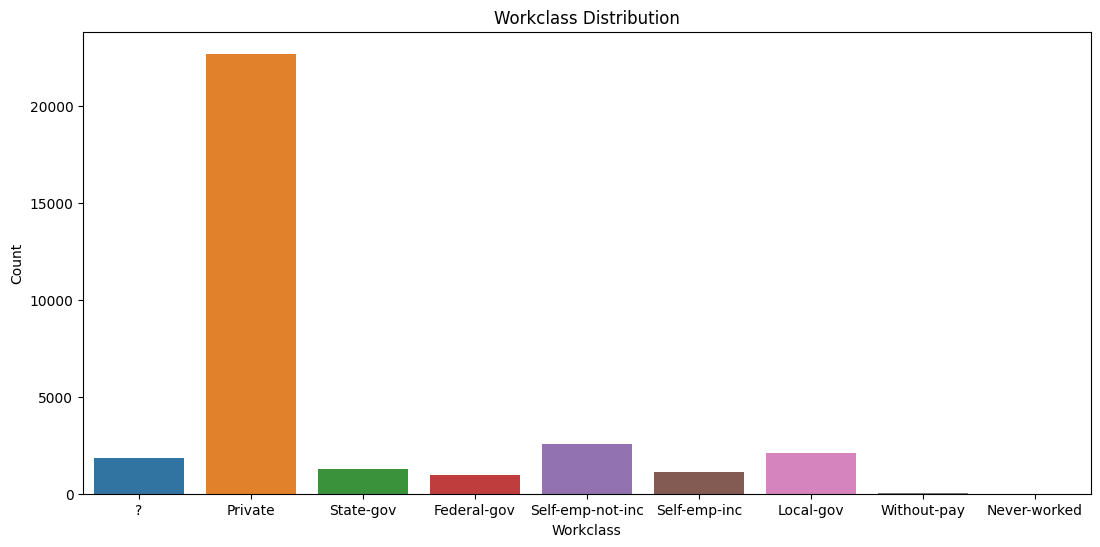

In [44]:
plt.figure(figsize=(13, 6))

ax = sns.countplot(x="workclass", data=df)

ax.set_xlabel("Workclass")
ax.set_ylabel("Count")
ax.set_title("Workclass Distribution")

plt.show()

Notes: The main difference between "self-employed incorporated" and "self-employed not incorporated" lies in the legal structure of the business. 


<Axes: xlabel='count', ylabel='sex'>

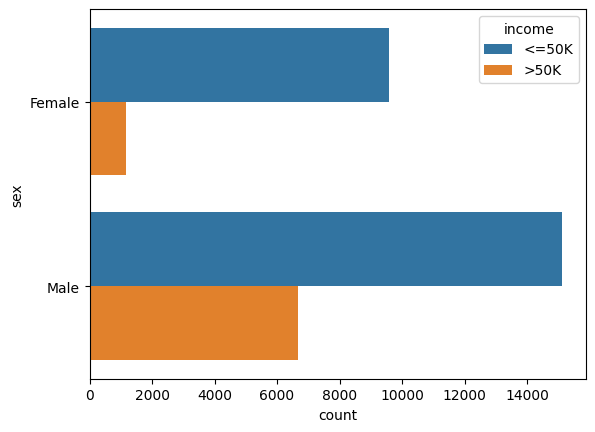

In [51]:
sns.countplot(data=df, y="sex", hue="income")

Males get a higher income than females

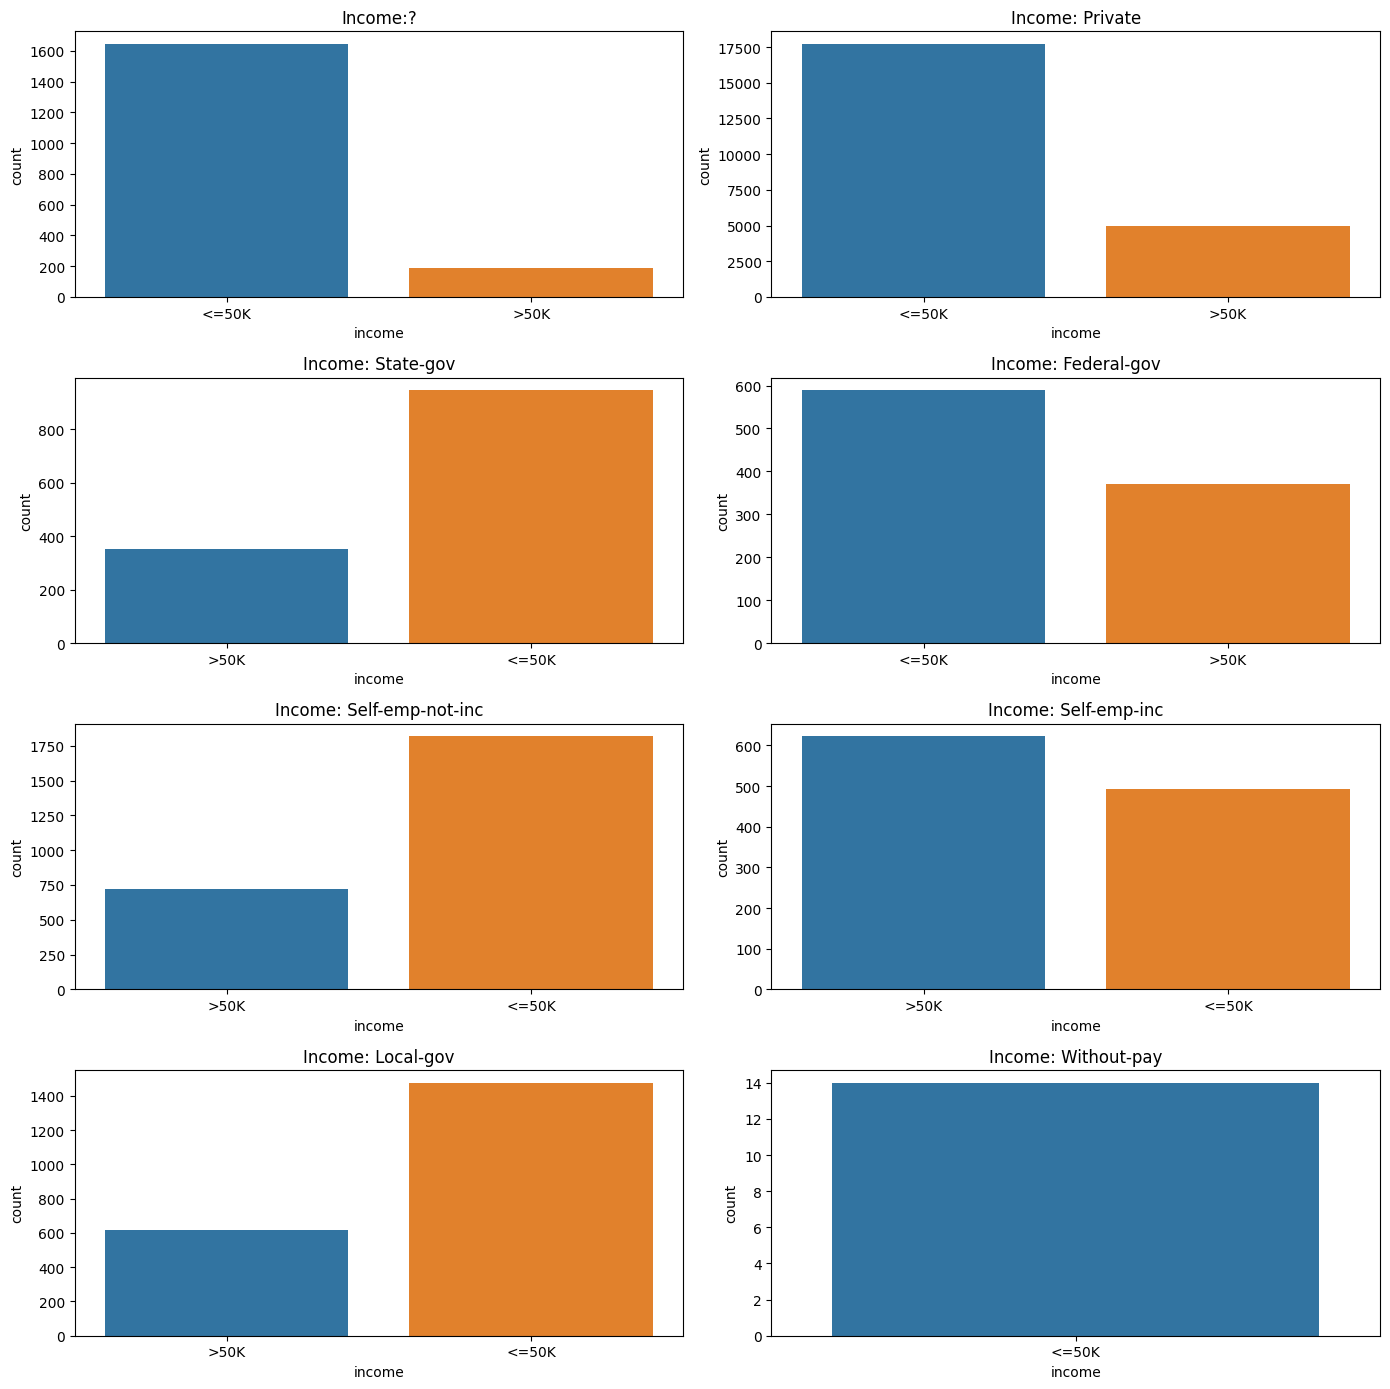

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df1 = df[df['workclass'] == '?']
filtered_df2 = df[df['workclass'] == 'Private']
filtered_df3 = df[df['workclass'] == 'State-gov']
filtered_df4 = df[df['workclass'] == 'Federal-gov']
filtered_df5 = df[df['workclass'] == 'Self-emp-not-inc']
filtered_df6 = df[df['workclass'] == 'Self-emp-inc']
filtered_df7 = df[df['workclass'] == 'Local-gov']
filtered_df8 = df[df['workclass'] == 'Without-pay']


# Set up the subplots manually
fig, axes = plt.subplots(4, 2, figsize=(14, 14))

# Create countplots for each income level
axes[0, 0].set_title(f"Income:?")
sns.countplot(x='income', data=filtered_df1, ax=axes[0, 0])

axes[0, 1].set_title(f"Income: Private")
sns.countplot(x='income', data=filtered_df2, ax=axes[0, 1])

axes[1, 0].set_title(f"Income: State-gov")
sns.countplot(x='income', data=filtered_df3, ax=axes[1, 0])

axes[1, 1].set_title(f"Income: Federal-gov")
sns.countplot(x='income', data=filtered_df4, ax=axes[1, 1])

axes[2, 0].set_title(f"Income: Self-emp-not-inc")
sns.countplot(x='income', data=filtered_df5, ax=axes[2, 0])

axes[2, 1].set_title(f"Income: Self-emp-inc")
sns.countplot(x='income', data=filtered_df6, ax=axes[2, 1])

axes[3, 0].set_title(f"Income: Local-gov")
sns.countplot(x='income', data=filtered_df7, ax=axes[3, 0])

axes[3, 1].set_title(f"Income: Without-pay")
sns.countplot(x='income', data=filtered_df8, ax=axes[3, 1])

# Adjust layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()


#### We can see that people working at Federal-gov and Self-emp-inc have a higher income comparative to other workclasses, and the private workclass is the most popular one.

## Let's find how well is balanced the target column

<Axes: ylabel='count'>

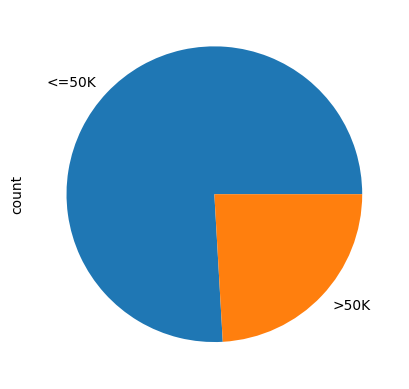

In [69]:
beta = df['income']
beta.value_counts().plot.pie()

#### we can notice that we have more samples of <=50k which is not good since the model will learn more from those samples (<=50k) and will have troubles detecting >50k samples but this problem will be solved later.

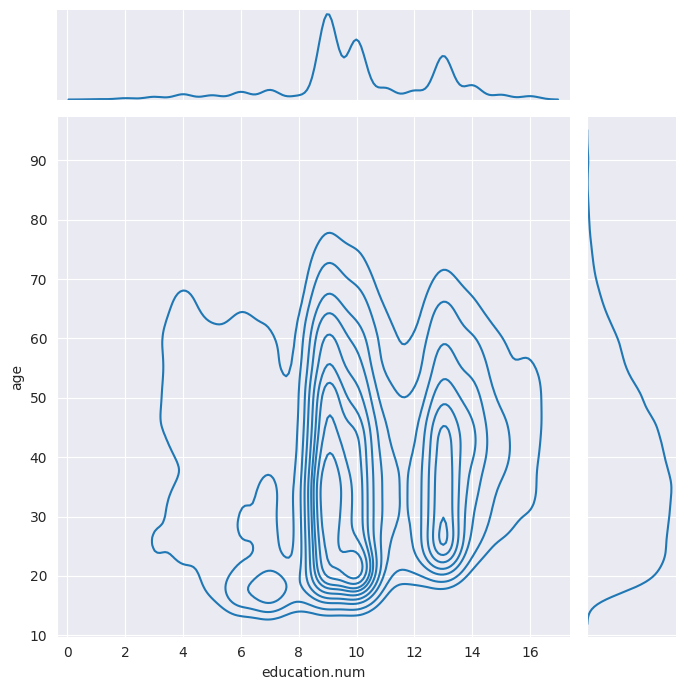

In [32]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df, y='age', x='education.num', kind='kde', height=7)

### According to the plot above we can say that people that are between 20 and 50 have the highest educational number

<Axes: xlabel='income', ylabel='education.num'>

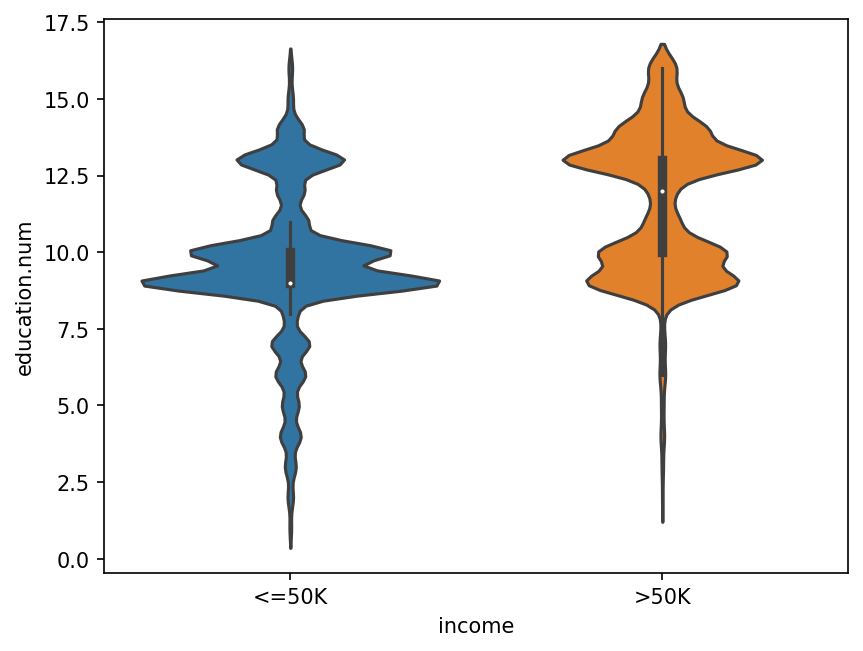

In [34]:
plt.figure(dpi=150)
sns.violinplot(y='education.num', x='income', data=df)

### From the violin plot above we can say that a higher educational number leads to a higher income

<Axes: xlabel='income', ylabel='capital.gain'>

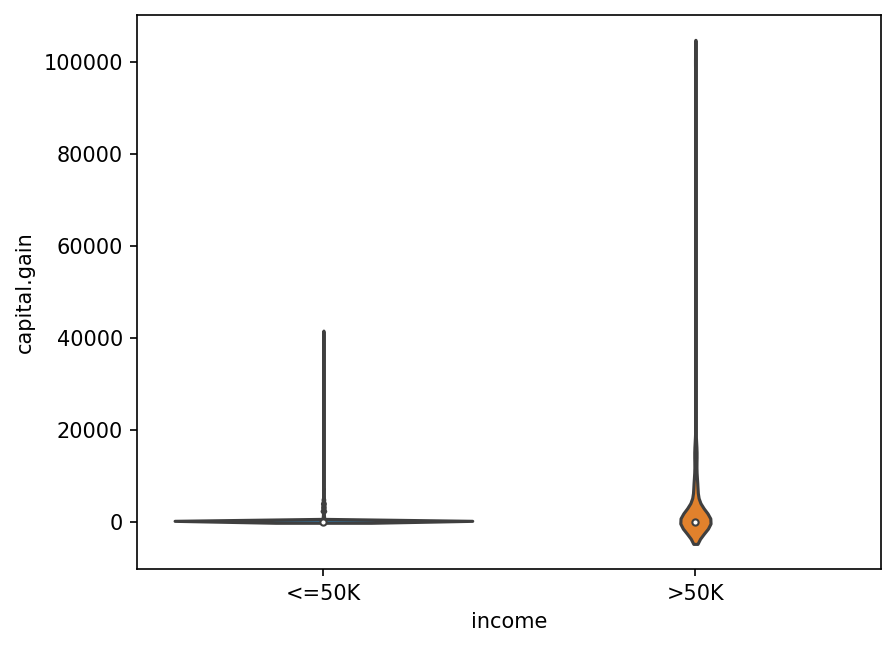

In [37]:
plt.figure(dpi=150)
sns.violinplot(y='capital.gain', x='income', data=df)

### From the violin plot above we can say that a higher capital.gain number leads to a higher income

<Axes: xlabel='income', ylabel='fnlwgt'>

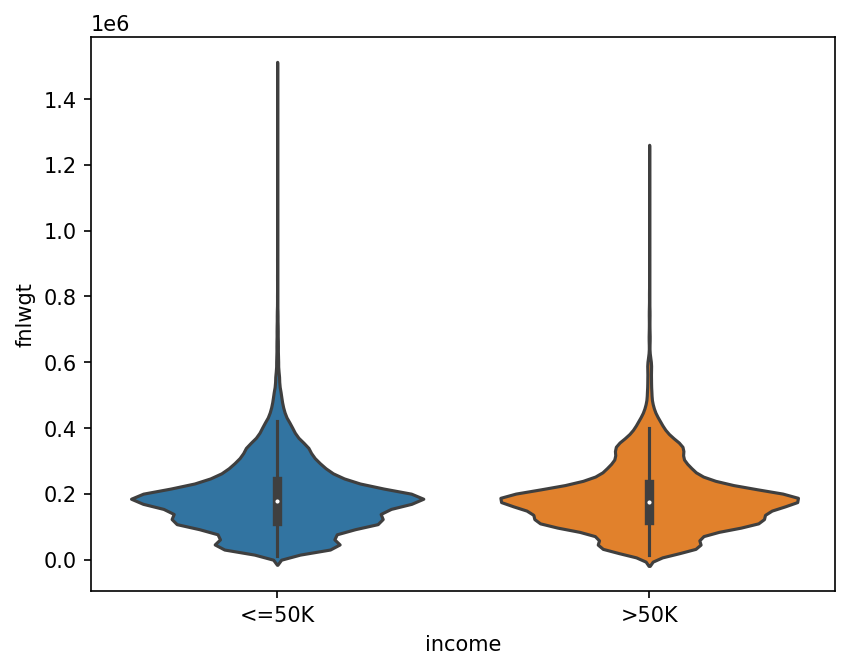

In [38]:
plt.figure(dpi=150)
sns.violinplot(y='fnlwgt', x='income', data=df)

#### We can see that finalweight column does not affect our target column directly since its just a value that characterize a sample in general by all features

<Axes: xlabel='income', ylabel='hours.per.week'>

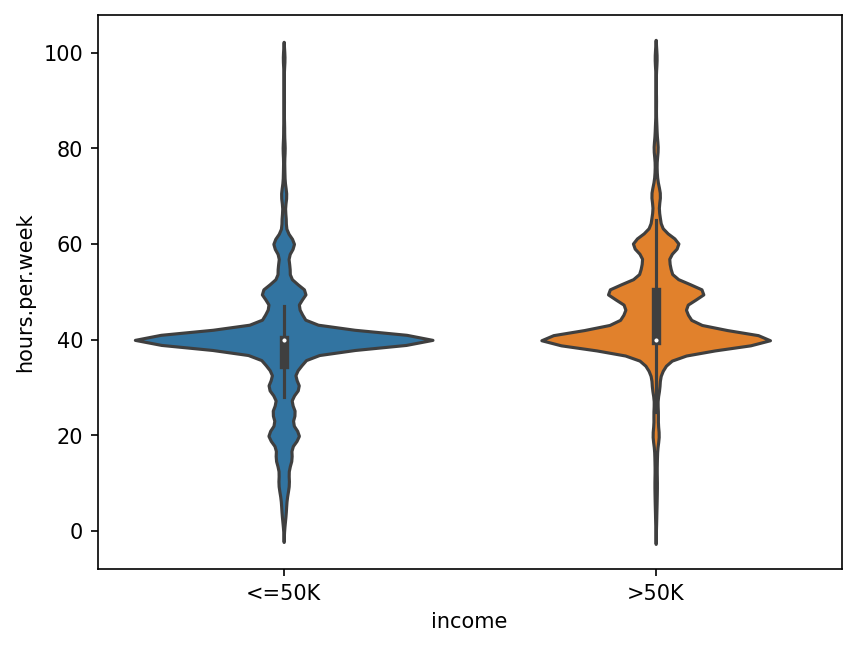

In [39]:
plt.figure(dpi=150)
sns.violinplot(y='hours.per.week', x='income', data=df)

#### We can see that more hours per week leads to a higher income

In [42]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [75]:
for m in ['age','education.num','capital.gain','capital.loss','hours.per.week']:
    Q1 = df[m].quantile(0.25)
    Q3 = df[m].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outliers = df[(df[m] < Q1 - threshold) | (df[m] > Q3 + threshold)]
    outlier_count = len(outliers)
    total_count = len(df[m])
    percentage_of_outliers = (outlier_count / total_count) * 100
    print(m, '-',percentage_of_outliers)


age - 0.43642622245443646
education.num - 3.6665949534376248
capital.gain - 8.335126164059378
capital.loss - 4.668531210621754
hours.per.week - 27.66696376432984


### The percentage of outliers is going to be measured later again after applying some outliers detection algorithms.

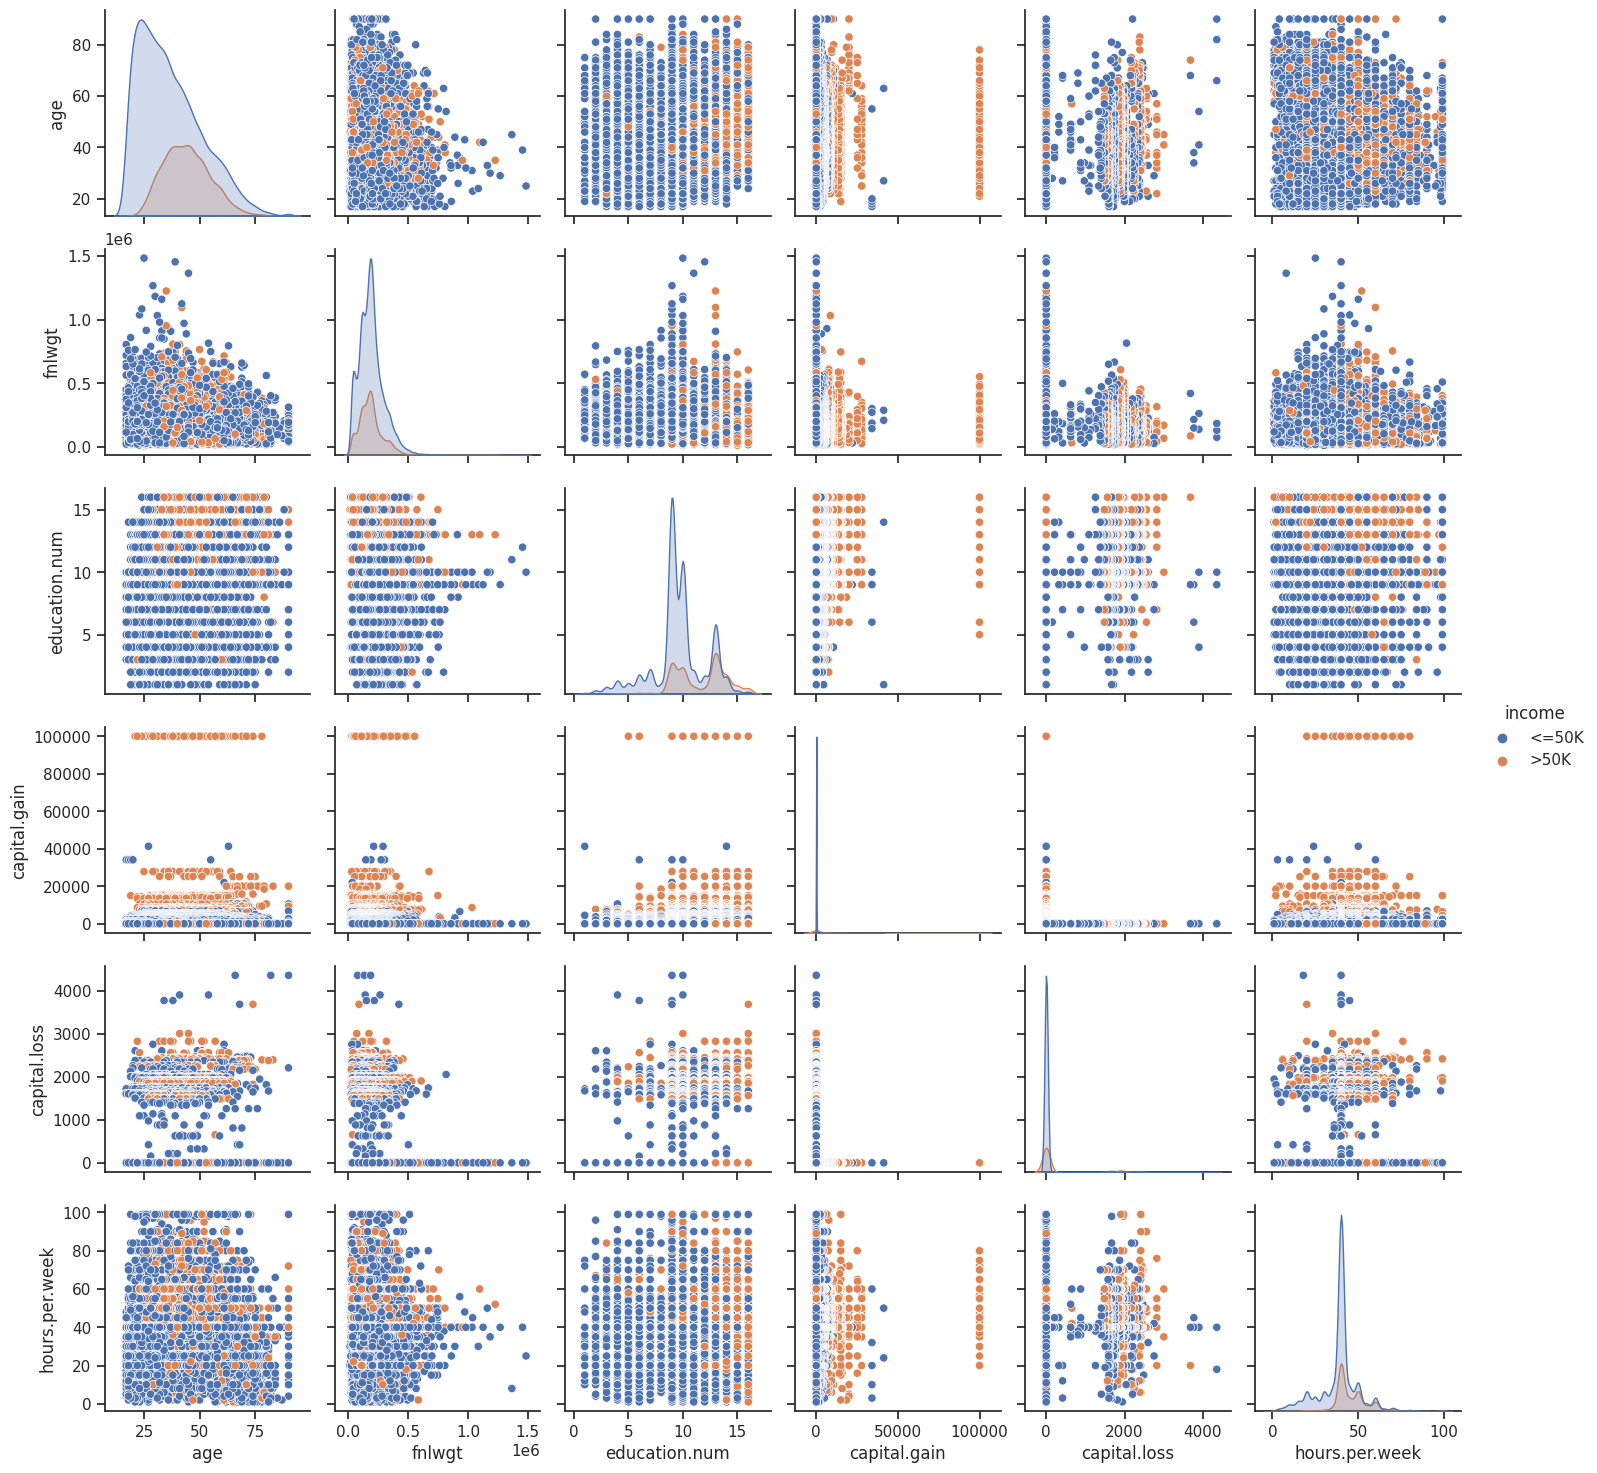

In [80]:
sns.set_theme(style="ticks")

a = sns.pairplot(df, hue="income")

### According to the graphs above we can see how each column interacts with another column in the same dataset. Also we can notice that education.num has a linear relatioship with income, the same relation can be noticed with hours.per.week and age columns. Other columns  do not seem to have a linear relationship therefore we can suppose that models trained on RandomForest and DeccisionTree may have a good prediction (we will check it later).